<a href="https://colab.research.google.com/github/send0moka/H1D022006_H1D022009_H1D022043_KAPITA-SELEKTA-A_TUGAS-SENTIMEN-ANALISIS/blob/main/H1D022006_H1D022009_H1D022043_KAPITA_SELEKTA_A_TUGAS_SENTIMEN_ANALISIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS SENTIMEN ANALISIS**

Mata Kuliah: Kapita Selekta Informatika A

Anggota:

1.   Jehian Athaya T (H1D022006)
2.   Brian Cahya P (H1D022009)
3.   Dzakwan Irfan R (H1D022043)

**Deskripsi**

1. **Crawling Data Twitter**

- Mengumpulkan tweet dengan kata kunci "kdm OR dedi OR mulyadi lang:id" menggunakan Tweet-Harvest.

- Menyimpan data dalam file CSV (`kdm-dataset.csv`).

2. **Preprocessing Data**

- Membersihkan data tweet (menghapus tanda baca, angka, URL, dll.).

- Normalisasi kata slang menggunakan file `slang-id.csv`.

- Menerapkan *stopwords removal* dan *stemming*.

- Mempertahankan kolom created_at untuk analisis tren waktu.

3. **Analisis Sentimen**

- Menggunakan model BERT (`bert-base-indonesian-1.5G-finetuned-sentiment-analysis-smsa`) dengan akurasi 93,73% pada dataset IndoNLU.

- Menerapkan prediksi sentimen pada kolom `tweet` untuk menghasilkan label (positif, netral, negatif) dan probabilitas.

- Menyediakan 8 sampel tweet dengan distribusi sentimen: 3 positif, 2 netral, 3 negatif.

4. **Visualisasi**

- Membuat visualisasi distribusi sentimen (misalnya, diagram batang, *pie chart*).

- Membuat visualisasi tren sentimen berdasarkan waktu (menggunakan kolom created_at).

# Crawl Data Twitter


In [ ]:
#@title 1. Instalasi Paket yang Diperlukan
# Menginstal pandas untuk pengolahan data
!pip install pandas

# Menginstal Node.js (diperlukan untuk menjalankan Tweet-Harvest)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg
!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list
!sudo apt-get update
!sudo apt-get install nodejs -y

# Memeriksa versi Node.js
!node -v

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Get:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,730 kB]
Get:13 https://r2u.stat.illinois.edu/u

In [ ]:
#@title 2. Proses Crawling Data Twitter
# Mengatur parameter untuk crawling
filename = 'kdm-dataset.csv'  # Nama file output
search_keyword = 'kdm OR dedi OR mulyadi lang:id'  # Kata kunci pencarian
limit = 10000  # Batas jumlah tweet yang akan di-crawl
twitter_auth_token = 'db6a621e5f314b45e5b910e07d9cd6f30d025a50'  # Token autentikasi Twitter

# Menjalankan Tweet-Harvest untuk mengumpulkan data
!npx --yes tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" -l {limit} --token {twitter_auth_token}

⠙⠹⠸⠼⠴Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Found existing file ./tweets-data/kdm-dataset.csv, renaming to ./tweets-data/kdm-dataset.old.csv

-- Scrolling... (1) (2)
Filling in keywords: kdm OR dedi OR mulyadi lang:id

 (3)

Your tweets saved to: /content/tweets-data/kdm-dataset.csv
Total tweets saved: 19

-- Scrolling... (1) (2) (3)

Your tweets saved to: /content/tweets-data/kdm-dataset.csv
Total tweets saved: 39

-- Scrolling... (1) (2) (3) (4)

Your tweets saved to: /content/tweets-data/kdm-dataset.csv
Total tweets saved: 59

-- Scrolling... (1) (2) (3)

Your tweets saved to: /content/tweets-data/kdm-dataset.csv
Total tweets saved: 79

-- S

In [ ]:
#@title 3. Membaca dan Menampilkan Data
import pandas as pd

# Menentukan path file CSV hasil crawling
file_path = f"tweets-data/{filename}"

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(file_path, delimiter=",")

# Menampilkan DataFrame
display(df)

# Menampilkan jumlah baris dalam DataFrame
num_rows = len(df)
print(f"Jumlah baris dalam DataFrame: {num_rows}")

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1918901924465619126,Sun May 04 05:34:04 +0000 2025,34736,Tawuran di Jabar setelah KDM mengirim siswa na...,1918901924465619126,https://pbs.twimg.com/media/GqFPIT2asAA95Om.jpg,NaN,in,NaN,308,295,4599,https://x.com/PetrolWeeb/status/19189019244656...,1303855886884986880,PetrolWeeb
1,1924022225050694059,Sun May 18 08:40:19 +0000 2025,20853,Popularitas Dedi Mulyadi meroket sejak menjadi...,1924022225050694059,https://pbs.twimg.com/media/GrOAA1QWcAAxBJ0.jpg,NaN,in,NaN,535,1348,4441,https://x.com/tempodotco/status/19240222250506...,18129942,tempodotco
2,1925303274124832858,Wed May 21 21:30:45 +0000 2025,1294,Manusia berkehendak Tuhan yang menentukan Onan...,1925303274124832858,https://pbs.twimg.com/media/GrgNHrtbIAA_REd.jpg,NaN,in,NaN,45,103,554,https://x.com/AgusMagelangan/status/1925303274...,71281076,AgusMagelangan
3,1916729836271448324,Mon Apr 28 05:42:58 +0000 2025,18247,Pusing bgt liat mulyadi. Pusing karena segala ...,1916729836271448324,NaN,NaN,in,NaN,397,332,4279,https://x.com/_mardial_/status/191672983627144...,95369720,_mardial_
4,1925200275112902727,Wed May 21 14:41:28 +0000 2025,21497,kdm : kamu beneran cinta ga sih sama aku? : k...,1925200275112902727,https://pbs.twimg.com/media/GrevcpGWAAA-khA.jpg,NaN,in,NaN,801,475,1764,https://x.com/kdrama_menfess/status/1925200275...,1012588105591713793,kdrama_menfess
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,1917820680944640039,Thu May 01 05:57:36 +0000 2025,1,Ibarat Liga Inggris Sementara KDM di posisi Ar...,1917820680944640039,NaN,NaN,in,NaN,2,1,0,https://x.com/Partono_ADjem/status/19178206809...,830258717341806592,Partono_ADjem
1493,1917805846890963280,Thu May 01 04:58:39 +0000 2025,1,Beranak Pinak dalam kemiskinan anak anak stunt...,1917805846890963280,NaN,NaN,in,NaN,0,0,0,https://x.com/Zhe_LeeCrystal/status/1917805846...,1722120385632858112,Zhe_LeeCrystal
1494,1917802554387583201,Thu May 01 04:45:34 +0000 2025,0,Dalam upaya menekan angka kemiskinan dan pertu...,1917802554387583201,https://pbs.twimg.com/media/Gp1nMJqaYAQsEH4.jpg,NaN,in,NaN,0,1,1,https://x.com/incaberita/status/19178025543875...,1911740506847297536,incaberita
1495,1917779290948796529,Thu May 01 03:13:08 +0000 2025,35,Dana Hibah Pesantren Diubek-ubek Kang Dedi Yay...,1917779290948796529,NaN,NaN,in,NaN,3,6,21,https://x.com/OposisiCerdas/status/19177792909...,887743587579944960,OposisiCerdas


Jumlah baris dalam DataFrame: 1497


# Preprocessing Data

In [ ]:
#@title 1. Cleaning Data
import re

# Memeriksa Nama Kolom
print("Kolom yang tersedia di DataFrame:")
print(df.columns.tolist())

# Menghapus semua kolom kecuali full_text dan created_at
df = df[['full_text', 'created_at']]

# Mengganti nama kolom full_text menjadi tweet
df = df.rename(columns={'full_text': 'tweet'})

# Mengubah teks menjadi huruf kecil (lowercase)
df['tweet'] = df['tweet'].str.lower()

# Menghapus semua simbol (tanda baca, karakter khusus, dll.)
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'[^\w\s]|[_]', '', x))

# Menghapus kata yang diawali dengan 'http' (link/URL)
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'\bhttp\w*\b', '', x))

# Menghapus angka
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'\d+', '', x))

# Menghapus spasi berlebih
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x.split()))

display(df)

Kolom yang tersedia di DataFrame:
['conversation_id_str', 'created_at', 'favorite_count', 'full_text', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username']


,tweet,created_at
0,tawuran di jabar setelah kdm mengirim siswa na...,Sun May 04 05:34:04 +0000 2025
1,popularitas dedi mulyadi meroket sejak menjadi...,Sun May 18 08:40:19 +0000 2025
2,manusia berkehendak tuhan yang menentukan onan...,Wed May 21 21:30:45 +0000 2025
3,pusing bgt liat mulyadi pusing karena segala g...,Mon Apr 28 05:42:58 +0000 2025
4,kdm kamu beneran cinta ga sih sama aku kalau n...,Wed May 21 14:41:28 +0000 2025
...,...,...
1492,ibarat liga inggris sementara kdm di posisi ar...,Thu May 01 05:57:36 +0000 2025
1493,beranak pinak dalam kemiskinan anak anak stunt...,Thu May 01 04:58:39 +0000 2025
1494,dalam upaya menekan angka kemiskinan dan pertu...,Thu May 01 04:45:34 +0000 2025
1495,dana hibah pesantren diubekubek kang dedi yaya...,Thu May 01 03:13:08 +0000 2025


In [ ]:
#@title 2. Normalisasi Kata Slang
# Membaca file slang-id.csv
slang_map = {}
with open('slang-id.csv', 'r') as f:
    for line in f:
        slang, normal = line.strip().split(',')
        slang_map[slang] = normal

# Fungsi untuk mengganti kata slang
def normalize_slang(text):
    words = text.split()
    normalized_words = [slang_map.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Menerapkan normalisasi pada kolom tweet
df['tweet'] = df['tweet'].apply(normalize_slang)

display(df)

,tweet,created_at
0,tawuran di jawa barat setelah kang dedi mulyad...,Sun May 04 05:34:04 +0000 2025
1,popularitas dedi mulyadi meroket sejak menjadi...,Sun May 18 08:40:19 +0000 2025
2,manusia berkehendak tuhan yang menentukan onan...,Wed May 21 21:30:45 +0000 2025
3,pusing sangat lihat mulyadi pusing karena sega...,Mon Apr 28 05:42:58 +0000 2025
4,kang dedi mulyadi kamu beneran cinta tidak sih...,Wed May 21 14:41:28 +0000 2025
...,...,...
1492,ibarat liga inggris sementara kang dedi mulyad...,Thu May 01 05:57:36 +0000 2025
1493,beranak pinak dalam kemiskinan anak anak stunt...,Thu May 01 04:58:39 +0000 2025
1494,dalam upaya menekan angka kemiskinan dan pertu...,Thu May 01 04:45:34 +0000 2025
1495,dana hibah pesantren diubekubek kang dedi yaya...,Thu May 01 03:13:08 +0000 2025


In [ ]:
#@title 3. Menghapus Stopwords
!pip install nltk
import nltk
from nltk.corpus import stopwords

# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Fungsi untuk menghapus stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Menerapkan penghapusan stopwords pada kolom tweet
df['tweet'] = df['tweet'].apply(remove_stopwords)

# Menampilkan DataFrame setelah penghapusan stopwords
display(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,created_at
0,tawuran jawa barat kang dedi mulyadi kirim sis...,Sun May 04 05:34:04 +0000 2025
1,popularitas dedi mulyadi meroket gubernur jawa...,Sun May 18 08:40:19 +0000 2025
2,manusia tuhan menentukan onana menjalankan mus...,Wed May 21 21:30:45 +0000 2025
3,pusing lihat mulyadi pusing gerak gerik efekti...,Mon Apr 28 05:42:58 +0000 2025
4,kang dedi mulyadi beneran cinta sih bicara suk...,Wed May 21 14:41:28 +0000 2025
...,...,...
1492,liga inggris kang dedi mulyadi posisi arsenal ...,Thu May 01 05:57:36 +0000 2025
1493,beranak pinak kemiskinan anak anak stunting te...,Thu May 01 04:58:39 +0000 2025
1494,upaya menekan angka kemiskinan pertumbuhan pen...,Thu May 01 04:45:34 +0000 2025
1495,dana hibah pesantren diubekubek kang dedi yaya...,Thu May 01 03:13:08 +0000 2025


In [ ]:
#@title 4. Stemming
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming
def stem_text(text):
    return stemmer.stem(text)

# Menerapkan stemming pada kolom tweet
df['tweet'] = df['tweet'].apply(stem_text)

# Menampilkan DataFrame setelah stemming
display(df)

,tweet,created_at
0,tawur jawa barat kang dedi mulyadi kirim siswa...,Sun May 04 05:34:04 +0000 2025
1,popularitas dedi mulyadi roket gubernur jawa b...,Sun May 18 08:40:19 +0000 2025
2,manusia tuhan tentu onana jalan musim mu full ...,Wed May 21 21:30:45 +0000 2025
3,pusing lihat mulyadi pusing gerak gerik efekti...,Mon Apr 28 05:42:58 +0000 2025
4,kang dedi mulyadi beneran cinta sih bicara suk...,Wed May 21 14:41:28 +0000 2025
...,...,...
1492,liga inggris kang dedi mulyadi posisi arsenal ...,Thu May 01 05:57:36 +0000 2025
1493,anak pinak miskin anak anak stunting lantar ja...,Thu May 01 04:58:39 +0000 2025
1494,upaya tekan angka miskin tumbuh duduk gubernur...,Thu May 01 04:45:34 +0000 2025
1495,dana hibah pesantren diubekubek kang dedi yaya...,Thu May 01 03:13:08 +0000 2025


In [ ]:
#@title 5. Menghapus Duplikasi dan Tweet Kosong
# Menghapus duplikasi
df = df.drop_duplicates()

# Menghapus tweet kosong
df = df[df['tweet'].str.strip() != '']

display(df)

,tweet,created_at
0,tawur jawa barat kang dedi mulyadi kirim siswa...,Sun May 04 05:34:04 +0000 2025
1,popularitas dedi mulyadi roket gubernur jawa b...,Sun May 18 08:40:19 +0000 2025
2,manusia tuhan tentu onana jalan musim mu full ...,Wed May 21 21:30:45 +0000 2025
3,pusing lihat mulyadi pusing gerak gerik efekti...,Mon Apr 28 05:42:58 +0000 2025
4,kang dedi mulyadi beneran cinta sih bicara suk...,Wed May 21 14:41:28 +0000 2025
...,...,...
1492,liga inggris kang dedi mulyadi posisi arsenal ...,Thu May 01 05:57:36 +0000 2025
1493,anak pinak miskin anak anak stunting lantar ja...,Thu May 01 04:58:39 +0000 2025
1494,upaya tekan angka miskin tumbuh duduk gubernur...,Thu May 01 04:45:34 +0000 2025
1495,dana hibah pesantren diubekubek kang dedi yaya...,Thu May 01 03:13:08 +0000 2025


In [ ]:
#@title 6. Tokenisasi
import nltk
from nltk.tokenize import word_tokenize

# Download resource untuk tokenisasi (jika belum di-download)
nltk.download('punkt')
nltk.download('punkt_tab')

# Fungsi untuk tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Menerapkan tokenisasi pada kolom 'tweet'
df['tokens'] = df['tweet'].apply(tokenize_text)

# Menampilkan DataFrame dengan kolom baru 'tokens'
display(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,tweet,created_at,tokens
0,tawur jawa barat kang dedi mulyadi kirim siswa...,Sun May 04 05:34:04 +0000 2025,"[tawur, jawa, barat, kang, dedi, mulyadi, kiri..."
1,popularitas dedi mulyadi roket gubernur jawa b...,Sun May 18 08:40:19 +0000 2025,"[popularitas, dedi, mulyadi, roket, gubernur, ..."
2,manusia tuhan tentu onana jalan musim mu full ...,Wed May 21 21:30:45 +0000 2025,"[manusia, tuhan, tentu, onana, jalan, musim, m..."
3,pusing lihat mulyadi pusing gerak gerik efekti...,Mon Apr 28 05:42:58 +0000 2025,"[pusing, lihat, mulyadi, pusing, gerak, gerik,..."
4,kang dedi mulyadi beneran cinta sih bicara suk...,Wed May 21 14:41:28 +0000 2025,"[kang, dedi, mulyadi, beneran, cinta, sih, bic..."
...,...,...,...
1492,liga inggris kang dedi mulyadi posisi arsenal ...,Thu May 01 05:57:36 +0000 2025,"[liga, inggris, kang, dedi, mulyadi, posisi, a..."
1493,anak pinak miskin anak anak stunting lantar ja...,Thu May 01 04:58:39 +0000 2025,"[anak, pinak, miskin, anak, anak, stunting, la..."
1494,upaya tekan angka miskin tumbuh duduk gubernur...,Thu May 01 04:45:34 +0000 2025,"[upaya, tekan, angka, miskin, tumbuh, duduk, g..."
1495,dana hibah pesantren diubekubek kang dedi yaya...,Thu May 01 03:13:08 +0000 2025,"[dana, hibah, pesantren, diubekubek, kang, ded..."


In [ ]:
#@title 7. Simpan Data Preprocessing
# Menampilkan jumlah baris dalam DataFrame
num_rows = len(df)
print(f"Jumlah baris dalam DataFrame setelah preprocessing: {num_rows}")

# Menyimpan hasil preprocessing ke file CSV baru
df.to_csv('tweets-data/kdm-dataset-preprocessed.csv', index=False)
print("Data hasil preprocessing disimpan ke 'tweets-data/kdm-dataset-preprocessed.csv'")

Jumlah baris dalam DataFrame setelah preprocessing: 1497
Data hasil preprocessing disimpan ke 'tweets-data/kdm-dataset-preprocessed.csv'


# Analisis Sentimen

In [ ]:
#@title 1. Install dan muat model
!pip install transformers torch datasets
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from huggingface_hub import ModelCard
import torch

# Memuat tokenizer dan model
model_name = "ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Pindahkan model ke GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model_card = ModelCard.load(model_name)

# Tampilkan konten model card
print("=== Model Card ===")
print(model_card.text)

=== Model Card ===

<!-- This model card has been generated automatically according to the information the Trainer had access to. You
should probably proofread and complete it, then remove this comment. -->

# bert-base-indonesian-1.5G-finetuned-sentiment-analysis-smsa

This model is a fine-tuned version of [cahya/bert-base-indonesian-1.5G](https://huggingface.co/cahya/bert-base-indonesian-1.5G) on the indonlu dataset.
It achieves the following results on the evaluation set:
- Loss: 0.3390
- Accuracy: 0.9373

## Model description

More information needed

## Intended uses & limitations

More information needed

## Training and evaluation data

More information needed

## Training procedure

### Training hyperparameters

The following hyperparameters were used during training:
- learning_rate: 2e-05
- train_batch_size: 16
- eval_batch_size: 16
- seed: 42
- optimizer: Adam with betas=(0.9,0.999) and epsilon=1e-08
- lr_scheduler_type: linear
- num_epochs: 10

### Training results

| Train

In [ ]:
#@title 2. Prediksi Sentimen
def predict_sentiment(text):
    # Tokenisasi teks
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # Prediksi
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()

    # Mapping kelas ke label sentimen
    label_map = {0: "positif", 1: "netral", 2: "negatif"}
    return label_map[predicted_class], probabilities[0].cpu().numpy()

# Daftar sampel tweet yang dimodifikasi untuk distribusi 3 positif, 2 netral, 3 negatif
sample_tweets = [
    "dedi mulyadi gubernur bagus cepat tanggap",
    "kdm peluk anak yatim penuh kasih sayang bikin hati terharu",
    "dedi bantu tenaga medis imc padalarang gaji dokter karyawan dibayar cepat tanggap terima kasih",
    "kasus almarhum kintan karyawati pt changsin jari kena mesin potong terus suruh operasi malah langsung mati rs fikri medika padahal tadi sehat belum beres kasian keluarga sempat tekan pihak rs",
    "dedi mulyadi pimpin jabar dua periode buat kebijakan ringan beban rakyat",
    "dedy ibu saya royok tetangga cucu rt miskin sampai injak seperti ibu saya lempar meja kena dada dedy rakyat kecil",
    "netizen kdm rujak kata bapak saya lambe turah dua orang nyinyir gubernur rapat dpr tadi",
    "anak notabene nakal sekolah biasa broken home kemarin saja berita ada siswi suka mabuk masuk barak setelah beberapa hari tidak mau pulang menurut barak sudah seperti rumah soal rumah ayah ibu tengkar terus"
]

# Prediksi sentimen untuk setiap sampel
print("Hasil Prediksi Sentimen untuk Sampel Tweet:")
print("-" * 50)
for text in sample_tweets:
    label, probs = predict_sentiment(text)
    print(f"Teks: {text}")
    print(f"Sentimen: {label}, Probabilitas: {probs}")
    print("-" * 50)

# Terapkan prediksi pada kolom 'tweet'
df['sentiment'] = df['tweet'].apply(lambda x: predict_sentiment(x)[0])
df['sentiment_prob'] = df['tweet'].apply(lambda x: predict_sentiment(x)[1].tolist())

# Tampilkan DataFrame dengan kolom sentimen
display(df)

Hasil Prediksi Sentimen untuk Sampel Tweet:
--------------------------------------------------
Teks: dedi mulyadi gubernur bagus cepat tanggap
Sentimen: positif, Probabilitas: [9.9977189e-01 9.8437777e-05 1.2968373e-04]
--------------------------------------------------
Teks: kdm peluk anak yatim penuh kasih sayang bikin hati terharu
Sentimen: positif, Probabilitas: [9.9870789e-01 1.0373333e-03 2.5480823e-04]
--------------------------------------------------
Teks: dedi bantu tenaga medis imc padalarang gaji dokter karyawan dibayar cepat tanggap terima kasih
Sentimen: netral, Probabilitas: [1.2312010e-04 9.9971265e-01 1.6426200e-04]
--------------------------------------------------
Teks: kasus almarhum kintan karyawati pt changsin jari kena mesin potong terus suruh operasi malah langsung mati rs fikri medika padahal tadi sehat belum beres kasian keluarga sempat tekan pihak rs
Sentimen: netral, Probabilitas: [2.06049648e-04 8.98284554e-01 1.01509444e-01]
-------------------------------

,tweet,created_at,tokens,sentiment,sentiment_prob
0,tawur jawa barat kang dedi mulyadi kirim siswa...,Sun May 04 05:34:04 +0000 2025,"[tawur, jawa, barat, kang, dedi, mulyadi, kiri...",negatif,"[0.00025834242114797235, 0.1508179008960724, 0..."
1,popularitas dedi mulyadi roket gubernur jawa b...,Sun May 18 08:40:19 +0000 2025,"[popularitas, dedi, mulyadi, roket, gubernur, ...",netral,"[0.0002733735600486398, 0.9995762705802917, 0...."
2,manusia tuhan tentu onana jalan musim mu full ...,Wed May 21 21:30:45 +0000 2025,"[manusia, tuhan, tentu, onana, jalan, musim, m...",negatif,"[0.00046196565381251276, 0.002762551186606288,..."
3,pusing lihat mulyadi pusing gerak gerik efekti...,Mon Apr 28 05:42:58 +0000 2025,"[pusing, lihat, mulyadi, pusing, gerak, gerik,...",negatif,"[0.00014867616118863225, 0.007789861876517534,..."
4,kang dedi mulyadi beneran cinta sih bicara suk...,Wed May 21 14:41:28 +0000 2025,"[kang, dedi, mulyadi, beneran, cinta, sih, bic...",positif,"[0.9983106851577759, 0.0008224814664572477, 0...."
...,...,...,...,...,...
1492,liga inggris kang dedi mulyadi posisi arsenal ...,Thu May 01 05:57:36 +0000 2025,"[liga, inggris, kang, dedi, mulyadi, posisi, a...",positif,"[0.9901601672172546, 0.00936146080493927, 0.00..."
1493,anak pinak miskin anak anak stunting lantar ja...,Thu May 01 04:58:39 +0000 2025,"[anak, pinak, miskin, anak, anak, stunting, la...",negatif,"[4.325166446506046e-05, 0.00017749627295415848..."
1494,upaya tekan angka miskin tumbuh duduk gubernur...,Thu May 01 04:45:34 +0000 2025,"[upaya, tekan, angka, miskin, tumbuh, duduk, g...",netral,"[0.0027284857351332903, 0.9969998002052307, 0...."
1495,dana hibah pesantren diubekubek kang dedi yaya...,Thu May 01 03:13:08 +0000 2025,"[dana, hibah, pesantren, diubekubek, kang, ded...",netral,"[0.00013879760808777064, 0.9997093081474304, 0..."


In [ ]:
#@title 3. Hitung distribusi sentimen
sentiment_counts = df['sentiment'].value_counts()
print("Distribusi Sentimen:")
print(sentiment_counts)

# Persentase sentimen
sentiment_percentages = df['sentiment'].value_counts(normalize=True) * 100
print("\nPersentase Sentimen:")
print(sentiment_percentages)

df.to_csv('tweets-data/kdm-dataset-sentiment.csv', index=False)
print("Data dengan hasil sentimen disimpan ke 'tweets-data/kdm-dataset-sentiment.csv'")

Distribusi Sentimen:
sentiment
netral     863
positif    339
negatif    295
Name: count, dtype: int64

Persentase Sentimen:
sentiment
netral     57.648631
positif    22.645291
negatif    19.706079
Name: proportion, dtype: float64
Data dengan hasil sentimen disimpan ke 'tweets-data/kdm-dataset-sentiment.csv'


<ipython-input-82-e1ae04e61b41>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis', order=['positif', 'netral', 'negatif'])


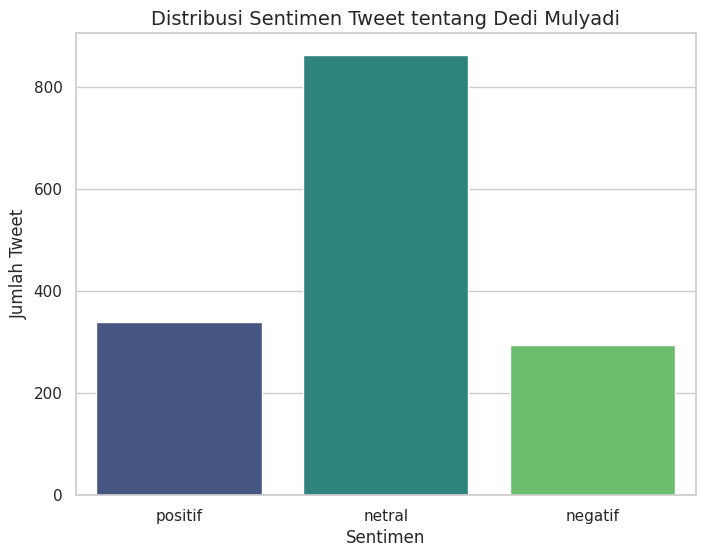

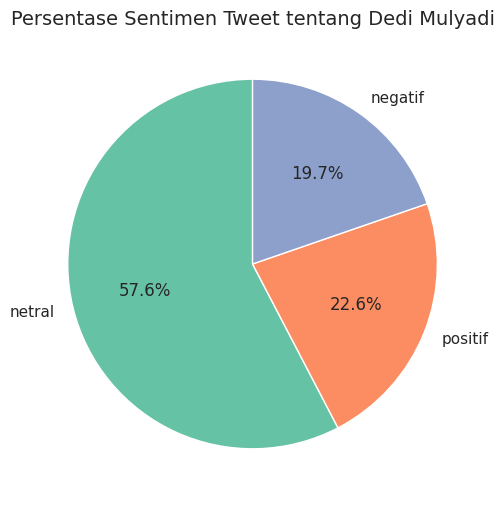

<ipython-input-82-e1ae04e61b41>:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


<Figure size 1200x600 with 0 Axes>

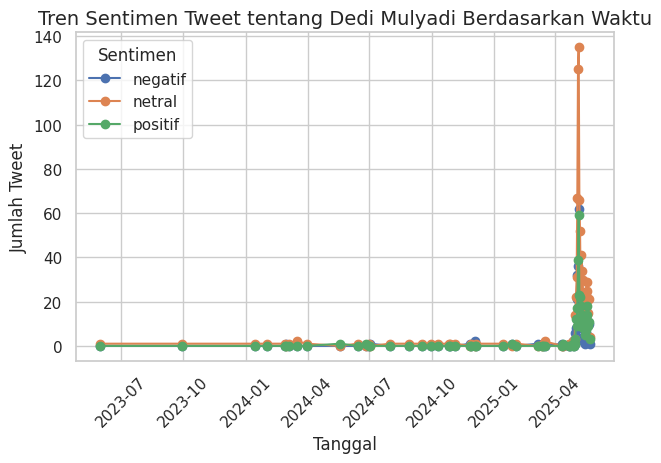

In [ ]:
#@title 4. Visualisasi Tren Sentimen
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tema visualisasi
sns.set(style="whitegrid")

# Diagram Batang untuk Distribusi Sentimen
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='viridis', order=['positif', 'netral', 'negatif'])
plt.title('Distribusi Sentimen Tweet tentang Dedi Mulyadi', fontsize=14)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
plt.show()

# Pie Chart untuk Persentase Sentimen
plt.figure(figsize=(8, 6))
sentiment_percentages = df['sentiment'].value_counts(normalize=True) * 100
sentiment_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'], startangle=90)
plt.title('Persentase Sentimen Tweet tentang Dedi Mulyadi', fontsize=14)
plt.ylabel('')
plt.show()

# Visualisasi Tren Waktu (menggunakan created_at)
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
sentiment_trend = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sentiment_trend.plot(kind='line', marker='o')
plt.title('Tren Sentimen Tweet tentang Dedi Mulyadi Berdasarkan Waktu', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
plt.legend(title='Sentimen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

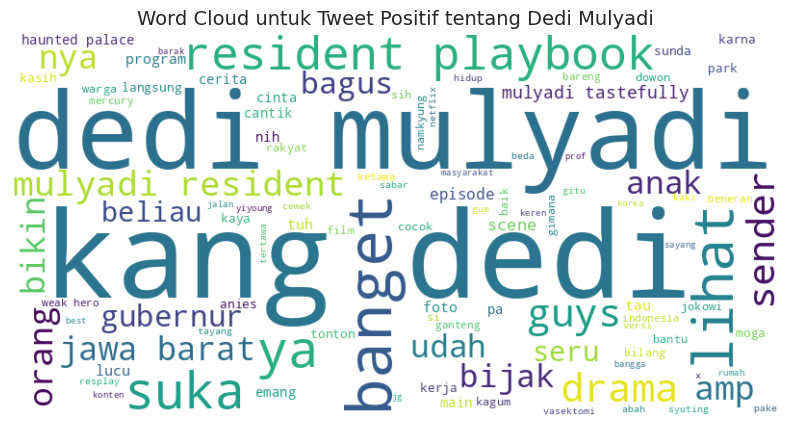

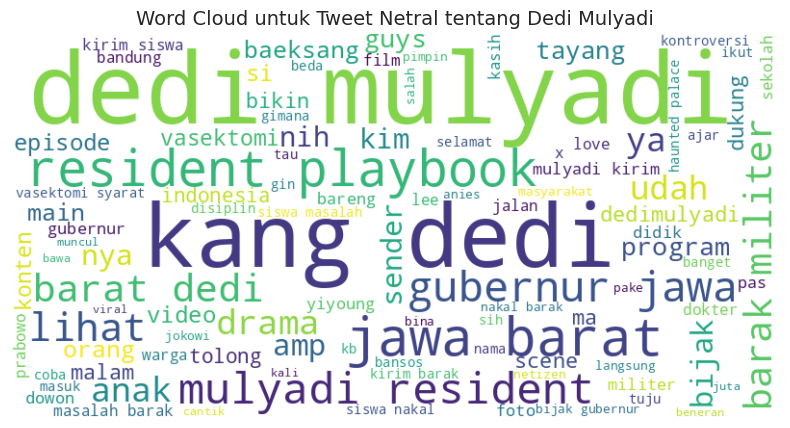

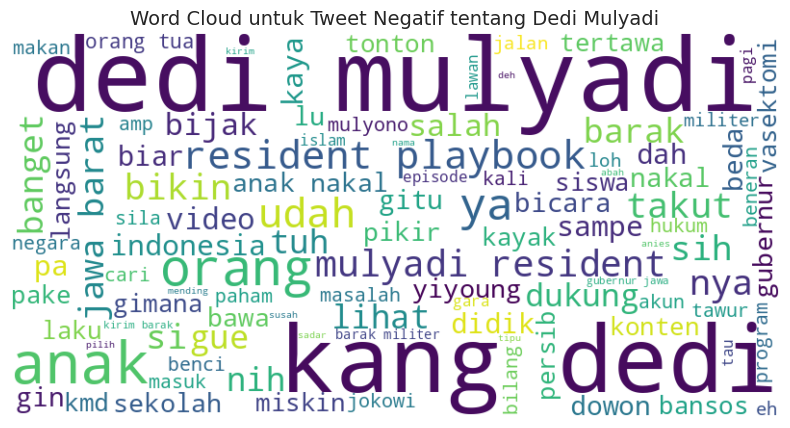

In [ ]:
#@title 5. Word Cloud
from wordcloud import WordCloud

# Gabungkan tweet berdasarkan sentimen
positive_tweets = ' '.join(df[df['sentiment'] == 'positif']['tweet'])
neutral_tweets = ' '.join(df[df['sentiment'] == 'netral']['tweet'])
negative_tweets = ' '.join(df[df['sentiment'] == 'negatif']['tweet'])

# Buat word cloud untuk tweet positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(positive_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Tweet Positif tentang Dedi Mulyadi', fontsize=14)
plt.show()

# Buat word cloud untuk tweet netral
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(neutral_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Tweet Netral tentang Dedi Mulyadi', fontsize=14)
plt.show()

# Buat word cloud untuk tweet negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(negative_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Tweet Negatif tentang Dedi Mulyadi', fontsize=14)
plt.show()

In [ ]:
#@title 7. Interpretasi Hasil Analisis
print("Interpretasi Hasil Analisis Sentimen")
print("-" * 50)
print(f"Distribusi sentimen: {df['sentiment'].value_counts().to_dict()}")
print(f"Persentase sentimen: {(df['sentiment'].value_counts(normalize=True) * 100).to_dict()}")

Interpretasi Hasil Analisis Sentimen
--------------------------------------------------
Distribusi sentimen: {'netral': 863, 'positif': 339, 'negatif': 295}
Persentase sentimen: {'netral': 57.64863059452237, 'positif': 22.645290581162325, 'negatif': 19.7060788243153}


**Analisis Sentimen Tweet Dedi Mulyadi**

Analisis sentimen terhadap *tweet* dengan kata kunci `'kdm OR dedi OR mulyadi lang:id'` menunjukkan bahwa mayoritas *tweet* bersifat **netral** (57.6%), diikuti oleh **positif** (22.6%) dan **negatif** (19.7%).

**Rincian Sentimen**

Sentimen netral yang dominan mencerminkan sikap publik yang cenderung informatif atau tidak memihak terkait Dedi Mulyadi, seperti pemberitaan atau diskusi umum tentang aktivitasnya.

Sentimen positif yang cukup signifikan menunjukkan adanya dukungan publik terhadap kinerja cepat tanggap Dedi Mulyadi, terutama dalam menangani isu-isu lokal di Jawa Barat.

Namun, sentimen negatif yang ada mengindikasikan adanya kontroversi, kemungkinan terkait kebijakan atau tindakan yang dianggap menyinggung oleh sebagian kelompok.

> "**Catatan**: *Tren waktu (dari visualisasi) menunjukkan bahwa sentimen positif cenderung meningkat pada bulan **April 2025** hingga saat ini, yang mungkin berkorelasi dengan peristiwa seperti aksi sosial atau kebijakan populer.*"


---

**Keandalan Model**

Model **BERT** yang digunakan memiliki akurasi `93,73%` pada *dataset* evaluasi IndoNLU, menunjukkan bahwa hasil prediksi sangat **andal**.